<h1><center>Supervised ML Regression Competition</center></h1>


<img align="center" src="https://compraracciones.com/wp-content/uploads/2021/04/insurance.jpg" style="height:200px" style="width:100px"/>

<hr style="border:2px solid pink"> </hr>

You have been assigned the task of building a model that will predict the insurance cost

You'll find the data in the csv file `insurance`


- target col: "charges"


<hr style="border:2px solid pink"> </hr>


**Guidelines:** 


- train_test_split
    - random state = 42
    - test size = 0.3


- The one who gets the highest r2-score on test data wins


## 1. Initial Data Exploration

Let's start by loading our dataset and taking a first look at it.


In [2]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\harid\Downloads\insurance.csv'
insurance_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
insurance_data.head()

# Check for missing values
insurance_data.isnull().sum()

# Summary statistics
insurance_data.describe()

# Data types of each column
insurance_data.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## 2. Checking for Missing Values

It's important to know if our data has any missing values. Let's check that next.


In [3]:
# Checking for missing values
insurance_data.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## 3. Descriptive Statistics

Now, let's move on to some descriptive statistics.

Understanding the distribution of our data is crucial. Let's calculate some descriptive statistics.


In [4]:
# Calculating descriptive statistics
insurance_data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,15799.570247
std,14.049960,6.098187,1.205493,12559.984021
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,8106.480000
50%,39.000000,30.400000,1.000000,12403.585225
75%,51.000000,34.693750,2.000000,18948.612903
max,64.000000,53.130000,5.000000,64571.074480


## 4. Distribution Analysis

Visualizing the distributions of our features can provide valuable insights. Let's plot the distributions for 'age', 'bmi', and 'charges'.

### Task:
- Plot the histogram for 'age'
- Plot the histogram for 'bmi'
- Plot the histogram for 'charges'


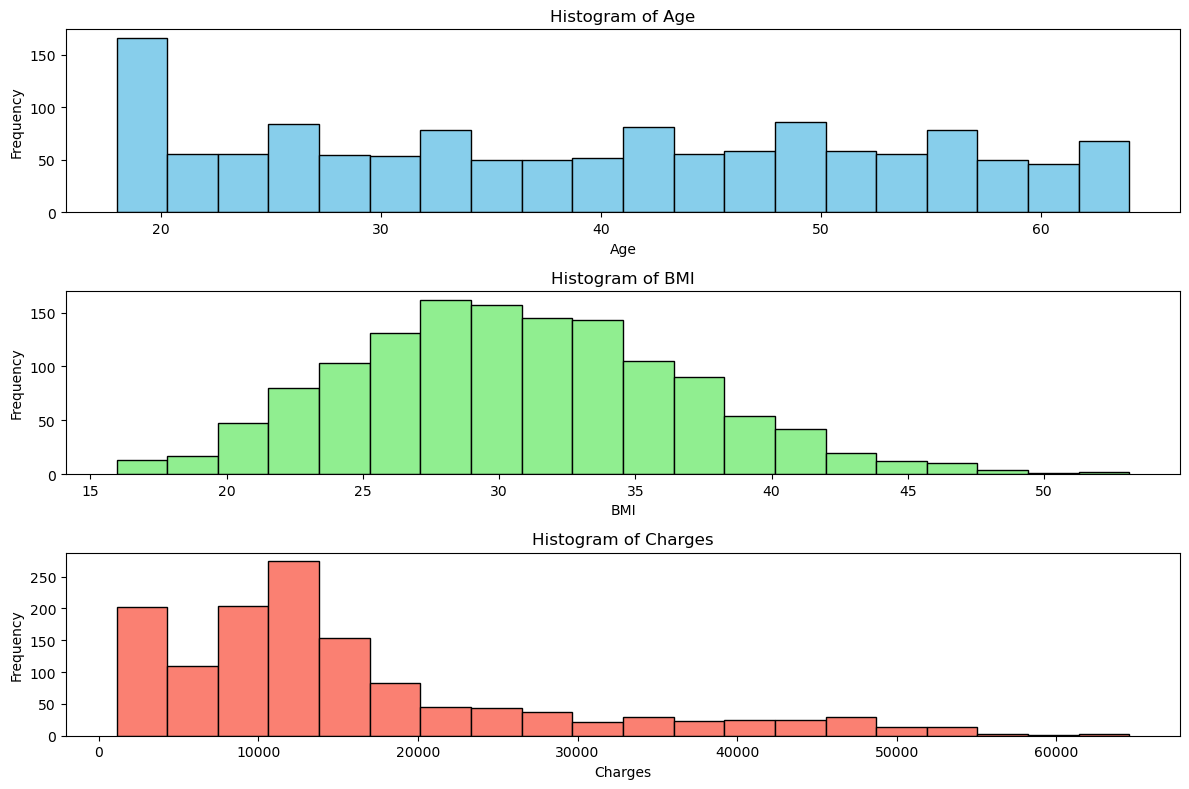

In [5]:
import matplotlib.pyplot as plt

# Plotting histograms for 'age', 'bmi', and 'charges'
plt.figure(figsize=(12, 8))

# Age histogram
plt.subplot(3, 1, 1)
plt.hist(insurance_data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# BMI histogram
plt.subplot(3, 1, 2)
plt.hist(insurance_data['bmi'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Charges histogram
plt.subplot(3, 1, 3)
plt.hist(insurance_data['charges'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## 5. Relationship Between Variables

Let's explore the relationship between some of our features and the target variable 'charges'. We'll create scatter plots to visualize these relationships.

### Task:
- Create a scatter plot for 'age' vs 'charges'
- Create a scatter plot for 'bmi' vs 'charges'
- Create a scatter plot for 'children' vs 'charges'


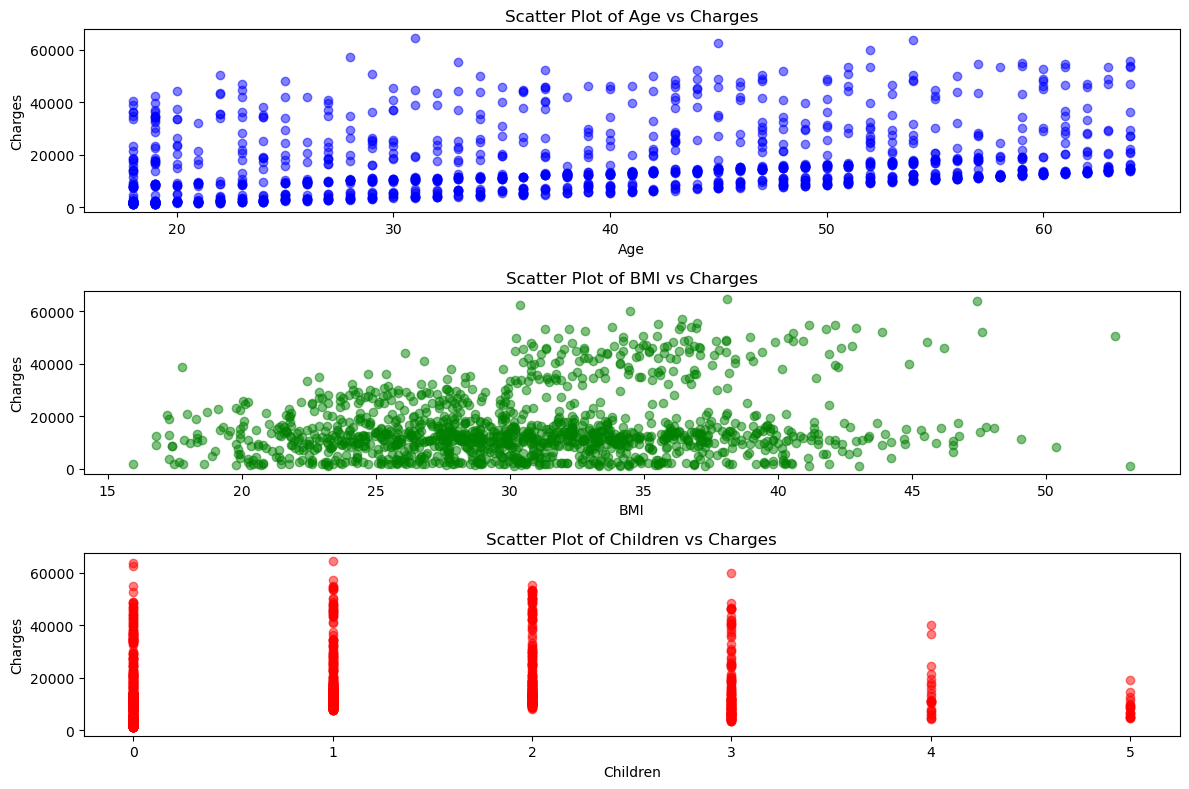

In [6]:
# Scatter plots for 'age' vs 'charges', 'bmi' vs 'charges', and 'children' vs 'charges'
plt.figure(figsize=(12, 8))

# Age vs Charges
plt.subplot(3, 1, 1)
plt.scatter(insurance_data['age'], insurance_data['charges'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

# BMI vs Charges
plt.subplot(3, 1, 2)
plt.scatter(insurance_data['bmi'], insurance_data['charges'], color='green', alpha=0.5)
plt.title('Scatter Plot of BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Children vs Charges
plt.subplot(3, 1, 3)
plt.scatter(insurance_data['children'], insurance_data['charges'], color='red', alpha=0.5)
plt.title('Scatter Plot of Children vs Charges')
plt.xlabel('Children')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()


## 6. Categorical Analysis

Let's analyze the categorical features 'sex', 'smoker', and 'region' to see how they relate to 'charges'.

### Task:
- Plot the distribution of 'charges' for different 'sex'
- Plot the distribution of 'charges' for different 'smoker'
- Plot the distribution of 'charges' for different 'region'


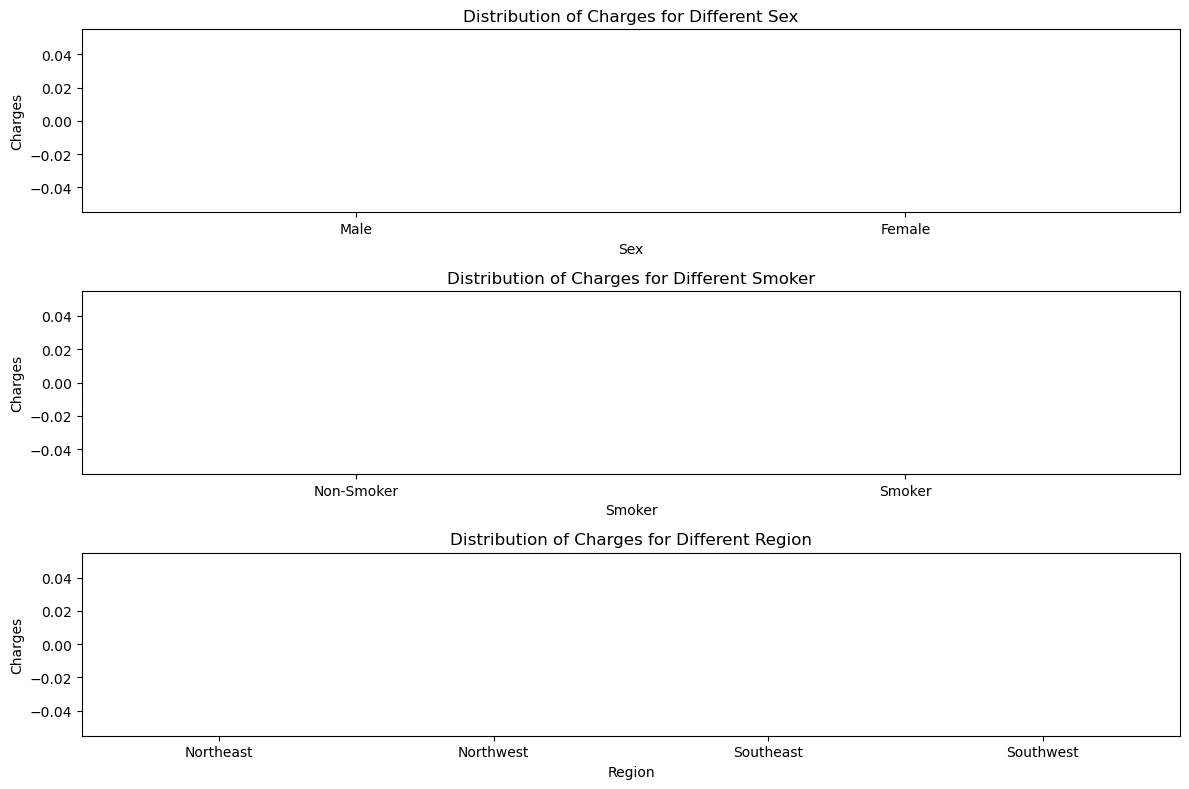

In [9]:
# Box plots for 'charges' vs 'sex', 'smoker', and 'region'
plt.figure(figsize=(12, 8))

# Charges vs Sex
plt.subplot(3, 1, 1)
bp1 = plt.boxplot([insurance_data[insurance_data['sex'] == 0]['charges'], 
                  insurance_data[insurance_data['sex'] == 1]['charges']], 
                  patch_artist=True)
plt.title('Distribution of Charges for Different Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.xticks([1, 2], ['Male', 'Female'])

# Charges vs Smoker
plt.subplot(3, 1, 2)
bp2 = plt.boxplot([insurance_data[insurance_data['smoker'] == 0]['charges'], 
                  insurance_data[insurance_data['smoker'] == 1]['charges']], 
                  patch_artist=True)
plt.title('Distribution of Charges for Different Smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.xticks([1, 2], ['Non-Smoker', 'Smoker'])

# Charges vs Region
plt.subplot(3, 1, 3)
bp3 = plt.boxplot([insurance_data[insurance_data['region'] == i]['charges'] for i in range(4)], 
                  patch_artist=True)
plt.title('Distribution of Charges for Different Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.xticks([1, 2, 3, 4], ['Northeast', 'Northwest', 'Southeast', 'Southwest'])

plt.tight_layout()
plt.show()


## 7. Correlation Analysis

To understand how our numerical features relate to each other and to the target variable, let's calculate and visualize the correlation matrix.

### Task:
- Calculate the correlation matrix for the dataset
- Visualize the correlation matrix using a heatmap


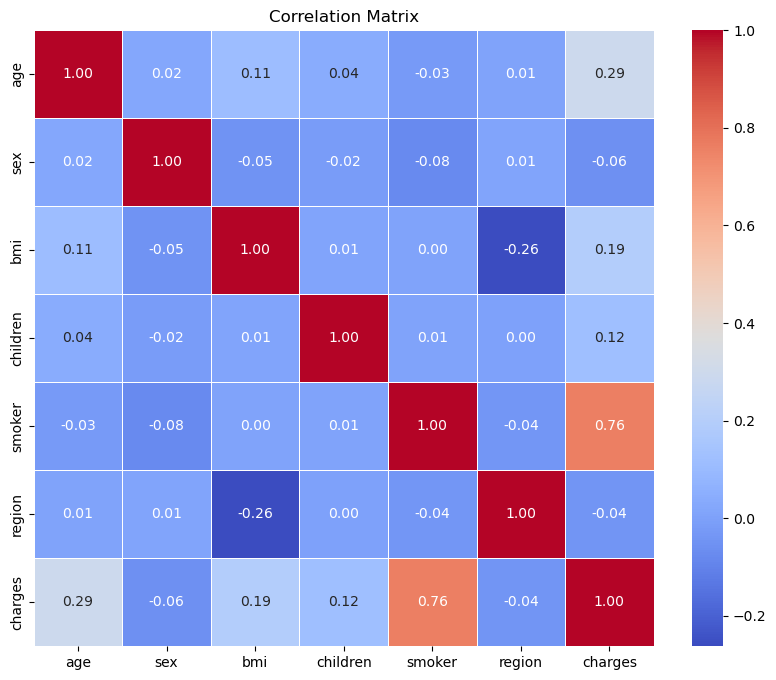

In [11]:
# Encoding categorical columns
insurance_data_encoded = insurance_data.copy()
insurance_data_encoded['sex'] = insurance_data_encoded['sex'].map({'male': 0, 'female': 1})
insurance_data_encoded['smoker'] = insurance_data_encoded['smoker'].map({'no': 0, 'yes': 1})
insurance_data_encoded['region'] = insurance_data_encoded['region'].map({
    'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3
})

# Calculate the correlation matrix
correlation_matrix = insurance_data_encoded.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Modelling time!

## 1. Find the Naive Baseline

Before we build any models, let's establish a naive baseline. This will help us understand how well our models perform compared to a simple approach. In regression problems, the naive baseline is often the mean of the target variable.

### Task:
- Calculate the mean of the target variable 'charges'
- Explain why it's important to establish a naive baseline


In [12]:
# Calculating the mean of the target variable 'charges'
mean_charges = insurance_data['charges'].mean()
mean_charges


15799.570247204036

## 2. Initial Modelling Without GridSearch or Pipeline

Let's build a simple linear regression model without any feature engineering, grid search, or pipeline. This will serve as our initial baseline for comparison.

### Task:
- Split the data into training and test sets
- Train a simple linear regression model
- Evaluate its performance using regression metrics
- Write it down as a markdown below so you can keep track. This is a scientific experiment


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X = insurance_data_encoded.drop(columns='charges')
y = insurance_data_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the performance using regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(43041921.2757225, 0.7261665716598688)

## 3. Feature Engineering

Now, let's brainstorm and create some new features to see if we can improve the model's performance.

### Questions:
1. Should we create an interaction feature between 'bmi' and 'children'? 
2. Should we create age groups to see if the model improves by categorizing age?
3. Should we create a high-risk indicator based on 'smoker' and 'bmi'?

- Remember nothing is set in stone, this is your experiment, your hypothesis. You may not need to, but its important to explore these questions

### Task:
- Create new features based on the questions above
- Explain the rationale behind each feature



1. It's possible that the combination of BMI and the number of children could reveal patterns that aren't captured by these features individually.
2. Categorizing age into different groups (e.g., '18-25', '26-40', '41-60', '60+') might improve the model by providing more meaningful insights.
3. Smokers with high BMI could be at a higher risk for certain health conditions.

In [14]:
# 1. Interaction feature between 'bmi' and 'children'
insurance_data_encoded['bmi_children_interaction'] = insurance_data_encoded['bmi'] * insurance_data_encoded['children']

# 2. Categorize age into groups
bins = [18, 25, 40, 60, 100]
labels = ['18-25', '26-40', '41-60', '60+']
insurance_data_encoded['age_group'] = pd.cut(insurance_data_encoded['age'], bins=bins, labels=labels, right=False)

# 3. High-risk indicator based on 'smoker' and 'bmi'
insurance_data_encoded['high_risk'] = ((insurance_data_encoded['smoker'] == 1) & (insurance_data_encoded['bmi'] > 30)).astype(int)

# Checking the newly added features
insurance_data_encoded[['bmi_children_interaction', 'age_group', 'high_risk']].head()


,bmi_children_interaction,age_group,high_risk
0,0.00,18-25,0
1,33.77,18-25,0
2,99.00,26-40,0
3,0.00,26-40,0
4,0.00,26-40,0


## 4. Modelling with Feature Engineering

Now that we have new features, let's see if they improve our model's performance.
Did it improve the performance? Yes? No? Why

### Task:
- Split the data into training and test sets
- Train a linear regression model with the new features
- Evaluate its performance using regression metrics


In [16]:
from sklearn.preprocessing import LabelEncoder

# Encode 'age_group' as numerical values
label_encoder = LabelEncoder()
insurance_data_encoded['age_group'] = label_encoder.fit_transform(insurance_data_encoded['age_group'])

# Split the data into training and test sets
X = insurance_data_encoded.drop(columns='charges')
y = insurance_data_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model with the new features
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the performance using regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(27519973.72979473, 0.8249174634657722)

## 5. Modelling with Pipeline and Grid Search

Now, let's see how using pipelines can simplify our workflow and prevent data leakage. We'll also use GridSearchCV to find the best hyperparameters.

### Task:
- Create a pipeline that includes scaling and linear regression
- Define a parameter grid for hyperparameter tuning
- Use GridSearchCV to find the best parameters and evaluate the model performance


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Create a pipeline with scaling and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'lr__fit_intercept': [True, False]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and evaluate the model performance
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'lr__fit_intercept': True}, -29923017.441443723)

## 6. Trying Another Model with Pipeline

Let's try using a Gradient Boosting Regressor to see if it performs better.

### Task:
- Create and use a pipeline for Gradient Boosting Regressor
- Define a parameter grid for grid search
- Use GridSearchCV to find the best parameters and evaluate the model


In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Create a pipeline with scaling and Gradient Boosting Regressor
pipeline_gbr = Pipeline([
    ('scaler', StandardScaler()),
    ('gbr', GradientBoostingRegressor())
])

# Define a parameter grid for hyperparameter tuning
param_grid_gbr = {
    'gbr__n_estimators': [50, 100],
    'gbr__learning_rate': [0.01, 0.1],
    'gbr__max_depth': [3, 5],
}

# Use GridSearchCV to find the best parameters
grid_search_gbr = GridSearchCV(pipeline_gbr, param_grid_gbr, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search_gbr.fit(X_train, y_train)

# Get the best parameters and evaluate the model performance
best_params_gbr = grid_search_gbr.best_params_
best_score_gbr = grid_search_gbr.best_score_

best_params_gbr, best_score_gbr


({'gbr__learning_rate': 0.1, 'gbr__max_depth': 3, 'gbr__n_estimators': 50},
 -22113388.56175692)

## 7. GridSearch with Several Models

Finally, let's compare several models using GridSearchCV to find the best one.

### Task:
- Define multiple models and their parameter grids
- Use GridSearchCV to find the best model and parameters


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define multiple models
models = [
    ('Linear Regression', Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LinearRegression())
    ])),
    ('Gradient Boosting', Pipeline([
        ('scaler', StandardScaler()),
        ('gbr', GradientBoostingRegressor())
    ])),
    ('SVR', Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR())
    ]))
]

# Define parameter grids for each model
param_grids = {
    'Linear Regression': {
        'lr__fit_intercept': [True, False]
    },
    'Gradient Boosting': {
        'gbr__n_estimators': [50, 100],
        'gbr__learning_rate': [0.01, 0.1],
        'gbr__max_depth': [3, 5]
    },
    'SVR': {
        'svr__C': [1, 10],
        'svr__gamma': ['scale', 'auto'],
        'svr__kernel': ['linear', 'rbf']
    }
}

# Initialize an empty list to store grid search results
grid_search_results = []

# Loop through each model and perform GridSearchCV
for name, model in models:
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    grid_search_results.append((name, grid_search.best_params_, grid_search.best_score_))

grid_search_results


[('Linear Regression', {'lr__fit_intercept': True}, -29923017.441443723),
 ('Gradient Boosting',
  {'gbr__learning_rate': 0.1, 'gbr__max_depth': 3, 'gbr__n_estimators': 50},
  -22113645.432528906),
 ('SVR',
  {'svr__C': 10, 'svr__gamma': 'scale', 'svr__kernel': 'linear'},
  -63060352.83304888)]

# Machine Learning: Master Challenge

## 8. Calculating Potential Cost or Loss

### Challenge:
Now that you've built and optimized your models, it's time for the final challenge! Your task is to minimize the Root Mean Squared Error (RMSE) of your model's predictions and calculate the potential financial impact of your model's errors.

### Task:
1. Calculate the RMSE of your final model's predictions.
2. Break down the errors into underestimation and overestimation.
3. Calculate the total potential cost or loss to the company.
4. Compete with your classmates to see who can achieve the lowest RMSE and financial impact!

### Explanation:
The RMSE provides an estimate of the average error in your model's predictions. We will also analyze the errors by categorizing them into underestimations and overestimations to understand their financial impact.

#### Steps to Calculate Underestimation and Overestimation Errors:

1. **Calculate RMSE**:
   - Use the `mean_squared_error` function from `sklearn.metrics` and pass your actual values (`y_test`) and predicted values (`y_pred_final`) to it.
   - Take the square root of the result to get the RMSE.
   
2. **Calculate Underestimation Error**:
   - Identify the instances where the actual charges (`y_test`) are greater than the predicted charges (`y_pred_final`).
   - For these instances, calculate the difference between the actual and predicted charges.
   - Sum these differences to get the total underestimation error.

3. **Calculate Overestimation Error**:
   - Identify the instances where the actual charges (`y_test`) are less than the predicted charges (`y_pred_final`).
   - For these instances, calculate the difference between the predicted and actual charges.
   - Sum these differences to get the total overestimation error.

4. **Calculate Total Potential Cost or Loss**:
   - Add the total underestimation error and the total overestimation error to get the total potential cost or loss.

### Let's see who can build the best model!

#### Detailed Instructions:

1. **Calculate RMSE**:
   - Use `mean_squared_error` with `y_test` and `y_pred_final`.
   - Use `np.sqrt` to take the square root of the result.

2. **Calculate Underestimation Error**:
   - Use a boolean condition to filter `y_test` values that are greater than `y_pred_final`.
   - Subtract the predicted values from the actual values for these instances.
   - Sum these differences.

3. **Calculate Overestimation Error**:
   - Use a boolean condition to filter `y_test` values that are less than `y_pred_final`.
   - Subtract the actual values from the predicted values for these instances.
   - Sum these differences.

4. **Calculate Total Potential Cost or Loss**:
   - Add the results of the underestimation error and overestimation error to get the total potential cost or loss.

### Example Walkthrough:

1. **Calculate RMSE**:
   - `rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))`
   - This gives you the average prediction error in dollars.

2. **Calculate Underestimation Error**:
   - `underestimation_error = np.sum(y_test[y_test > y_pred_final] - y_pred_final[y_test > y_pred_final])`
   - This gives you the total amount by which the model undercharged.

3. **Calculate Overestimation Error**:
   - `overestimation_error = np.sum(y_pred_final[y_test < y_pred_final] - y_test[y_test < y_pred_final])`
   - This gives you the total amount by which the model overcharged.

4. **Calculate Total Potential Cost or Loss**:
   - `total_potential_loss = underestimation_error + overestimation_error`
   - This gives you the total financial impact of the model's errors.

### Leaderboard:
Post your RMSE score and total potential cost or loss on the class leaderboard. The student with the lowest RMSE and total potential cost or loss wins bragging rights

### Post Your Results 

- Name
- Model Type
- RMSE
- Underestimation Error
- Overestimation Error
- Total Potential Cost/Loss

In [23]:
# Fit the model (pipeline) with the training data
model.fit(X_train, y_train)

# Now make predictions on the test data
y_pred_final = model.predict(X_test)

# Calculate RMSE, underestimation error, overestimation error, and total potential loss
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))

# Calculate Underestimation Error
underestimation_error = np.sum(y_test[y_test > y_pred_final] - y_pred_final[y_test > y_pred_final])

# Calculate Overestimation Error
overestimation_error = np.sum(y_pred_final[y_test < y_pred_final] - y_test[y_test < y_pred_final])

# Calculate Total Potential Cost or Loss
total_potential_loss = underestimation_error + overestimation_error

rmse, underestimation_error, overestimation_error, total_potential_loss


(12861.029688569499,
 2318486.7387415315,
 1115688.9630495242,
 3434175.7017910555)

## Conclusion

Congratulations! You've completed the lab. Here's a summary of what we've covered:
1. Established a naive baseline using the mean of the target variable.
2. Built an initial linear regression model without any feature engineering or optimization.
3. Performed feature engineering to create new, potentially useful features.
4. Used pipelines and GridSearchCV to optimize the model.
5. Evaluated the final model's performance using RMSE to understand its business impact.

By following these steps, you now have a robust understanding of how to approach a regression problem, from initial exploration to model optimization and business impact assessment. Great job!
